<h1 style="text-align:center; color:blue;">Churn Prediction & Customer Retention Strategy Project</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("customer churn data.xlsx")
df.shape

(7043, 23)

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Location
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,0,No,North - New York
1,5575-GNVDE,NaN,0,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.5,0.0,0,No,West - California
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,0,Yes,East - Illinois


### Data Cleaning and Outlier Detection

In [4]:
df.isnull().sum()

customerID            0
gender              396
SeniorCitizen         0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV         427
StreamingMovies     506
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
numAdminTickets     592
numTechTickets        0
Churn                 0
Location              0
dtype: int64

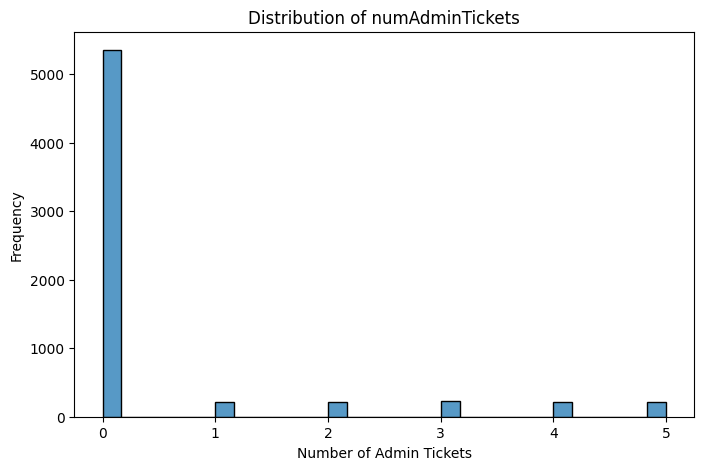

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['numAdminTickets'], bins=30, kde=False)
plt.title("Distribution of numAdminTickets")
plt.xlabel("Number of Admin Tickets")
plt.ylabel("Frequency")
plt.show()


In [6]:
pd.crosstab(df['numAdminTickets'], df['Churn'], normalize='index')


Churn,No,Yes
numAdminTickets,,
0.0,0.728937,0.271063
1.0,0.795238,0.204762
2.0,0.738739,0.261261
3.0,0.748936,0.251064
4.0,0.785714,0.214286
5.0,0.751131,0.248869


In [7]:
df['numAdminTickets'] = df['numAdminTickets'].fillna(0) # Domain knowledge

In [8]:
df[df['numAdminTickets'].isnull()]

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Location


In [9]:
# Handle missing values in gender
df['gender'] = df['gender'].fillna("Unknown")

# Quick check
print(df['gender'].value_counts(dropna=False))


gender
Male       3333
Female     3314
Unknown     396
Name: count, dtype: int64


In [10]:
df["StreamingTV"].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [11]:
df["StreamingMovies"].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [12]:
# Handle missing values in StreamingTV
df['StreamingTV'] = df['StreamingTV'].fillna("Unknown")

# Quick check
print(df['StreamingTV'].value_counts(dropna=False))
print(df['StreamingTV'].unique())


StreamingTV
No                     2631
Yes                    2547
No internet service    1438
Unknown                 427
Name: count, dtype: int64
['No' 'Yes' 'Unknown' 'No internet service']


In [13]:
# Handle missing values in StreamingMovies
df['StreamingMovies'] = df['StreamingMovies'].fillna("Unknown")

# Quick check
print(df['StreamingMovies'].value_counts(dropna=False))
print(df['StreamingMovies'].unique())


StreamingMovies
No                     2565
Yes                    2550
No internet service    1422
Unknown                 506
Name: count, dtype: int64
['No' 'Yes' 'Unknown' 'No internet service']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)  # if any new NaN created


In [16]:
columns_continuous = ['tenure', 'MonthlyCharges', 
                      'numTechTickets', 'numAdminTickets']


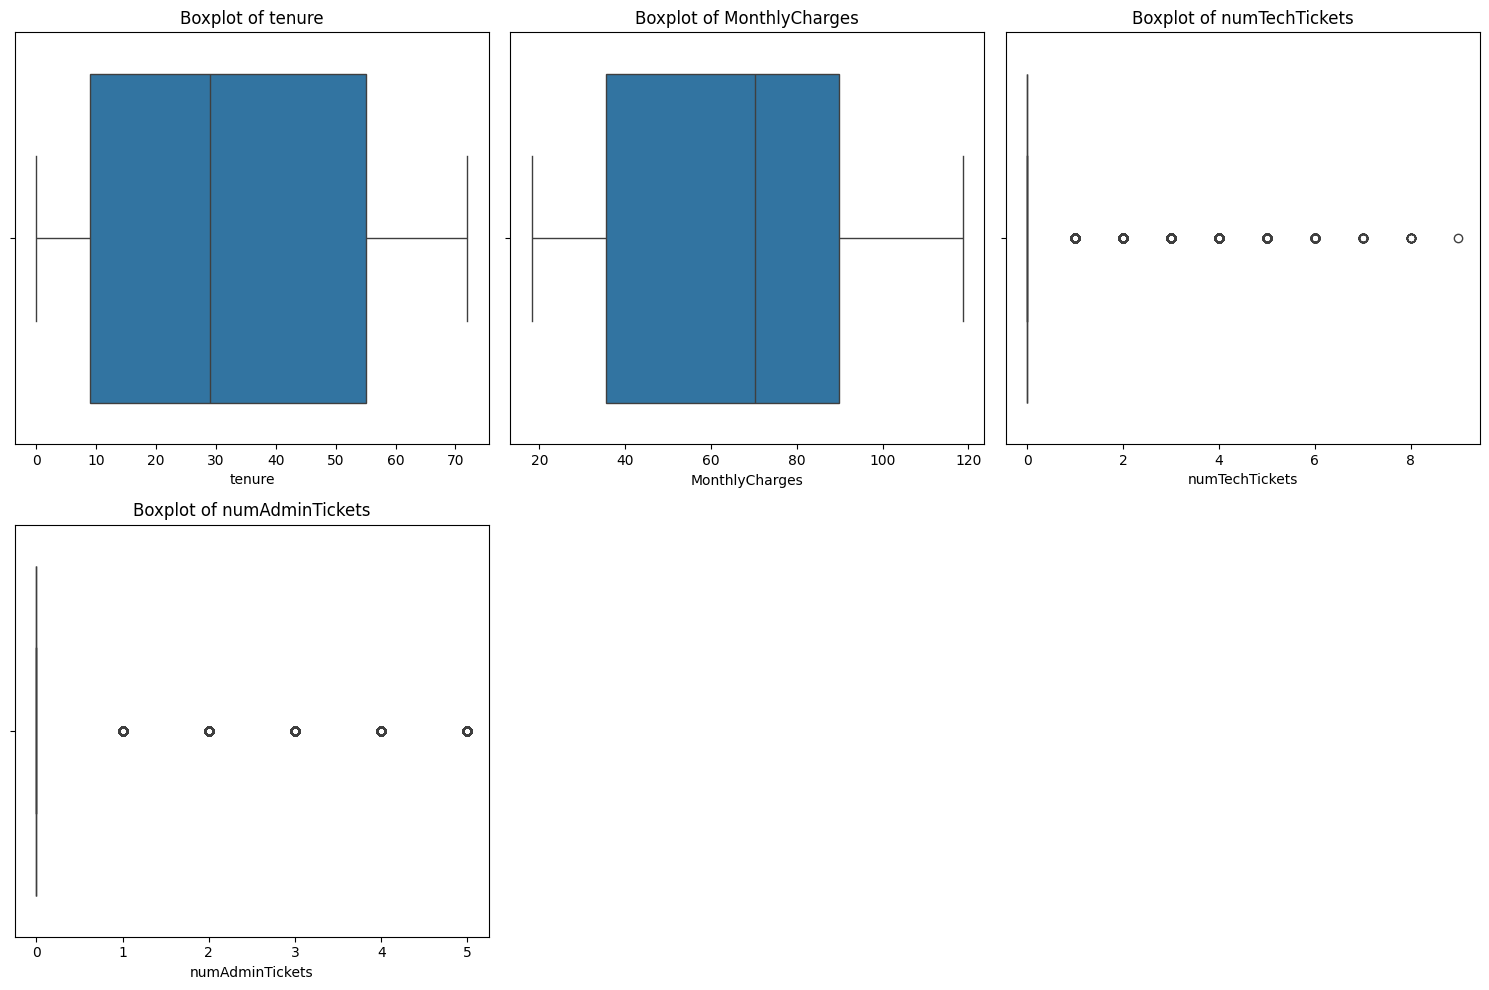

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(columns_continuous)
num_cols = 3   # plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, num_rows * num_cols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


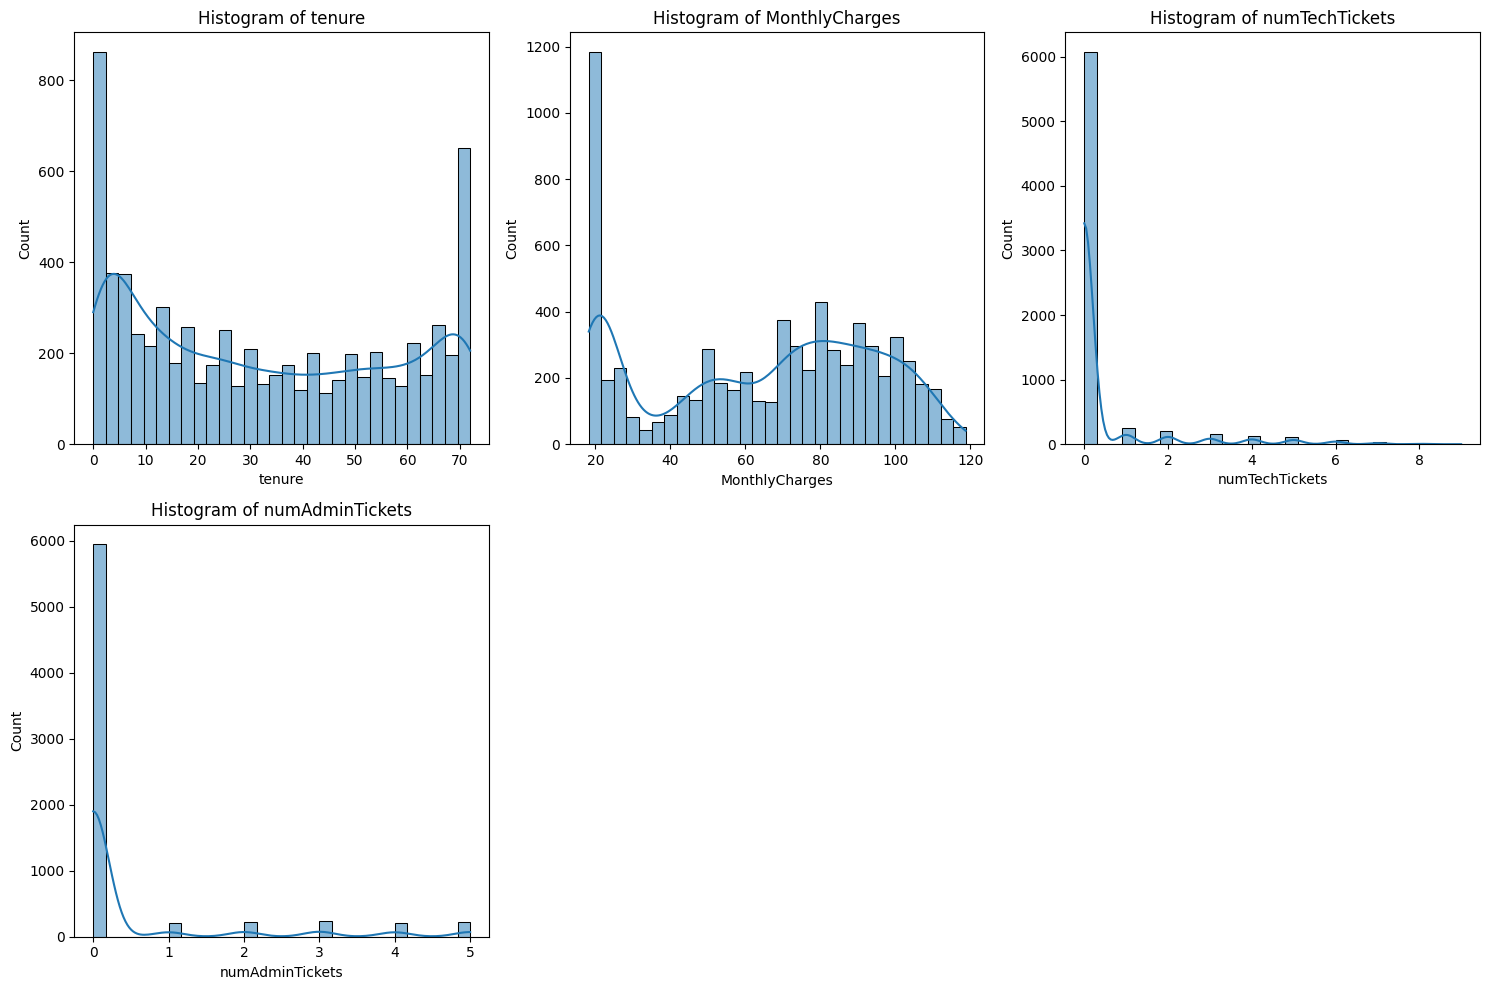

In [18]:
num_plots = len(columns_continuous)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

for j in range(i+1, num_rows * num_cols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [19]:
df["numTechTickets"].describe()

count    7043.000000
mean        0.419566
std         1.250117
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: numTechTickets, dtype: float64

In [20]:
df["numAdminTickets"].describe()

count    7043.000000
mean        0.469118
std         1.223877
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: numAdminTickets, dtype: float64

### Exploratory Data Analysis (EDA)

In [21]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

C:\Users\rutwi\AppData\Local\Temp\ipykernel_16504\913185376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


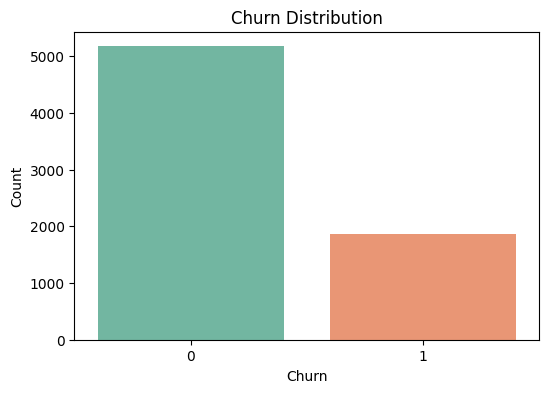

Churn Rate: 26.54%


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Also check churn percentage
churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")


In [23]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

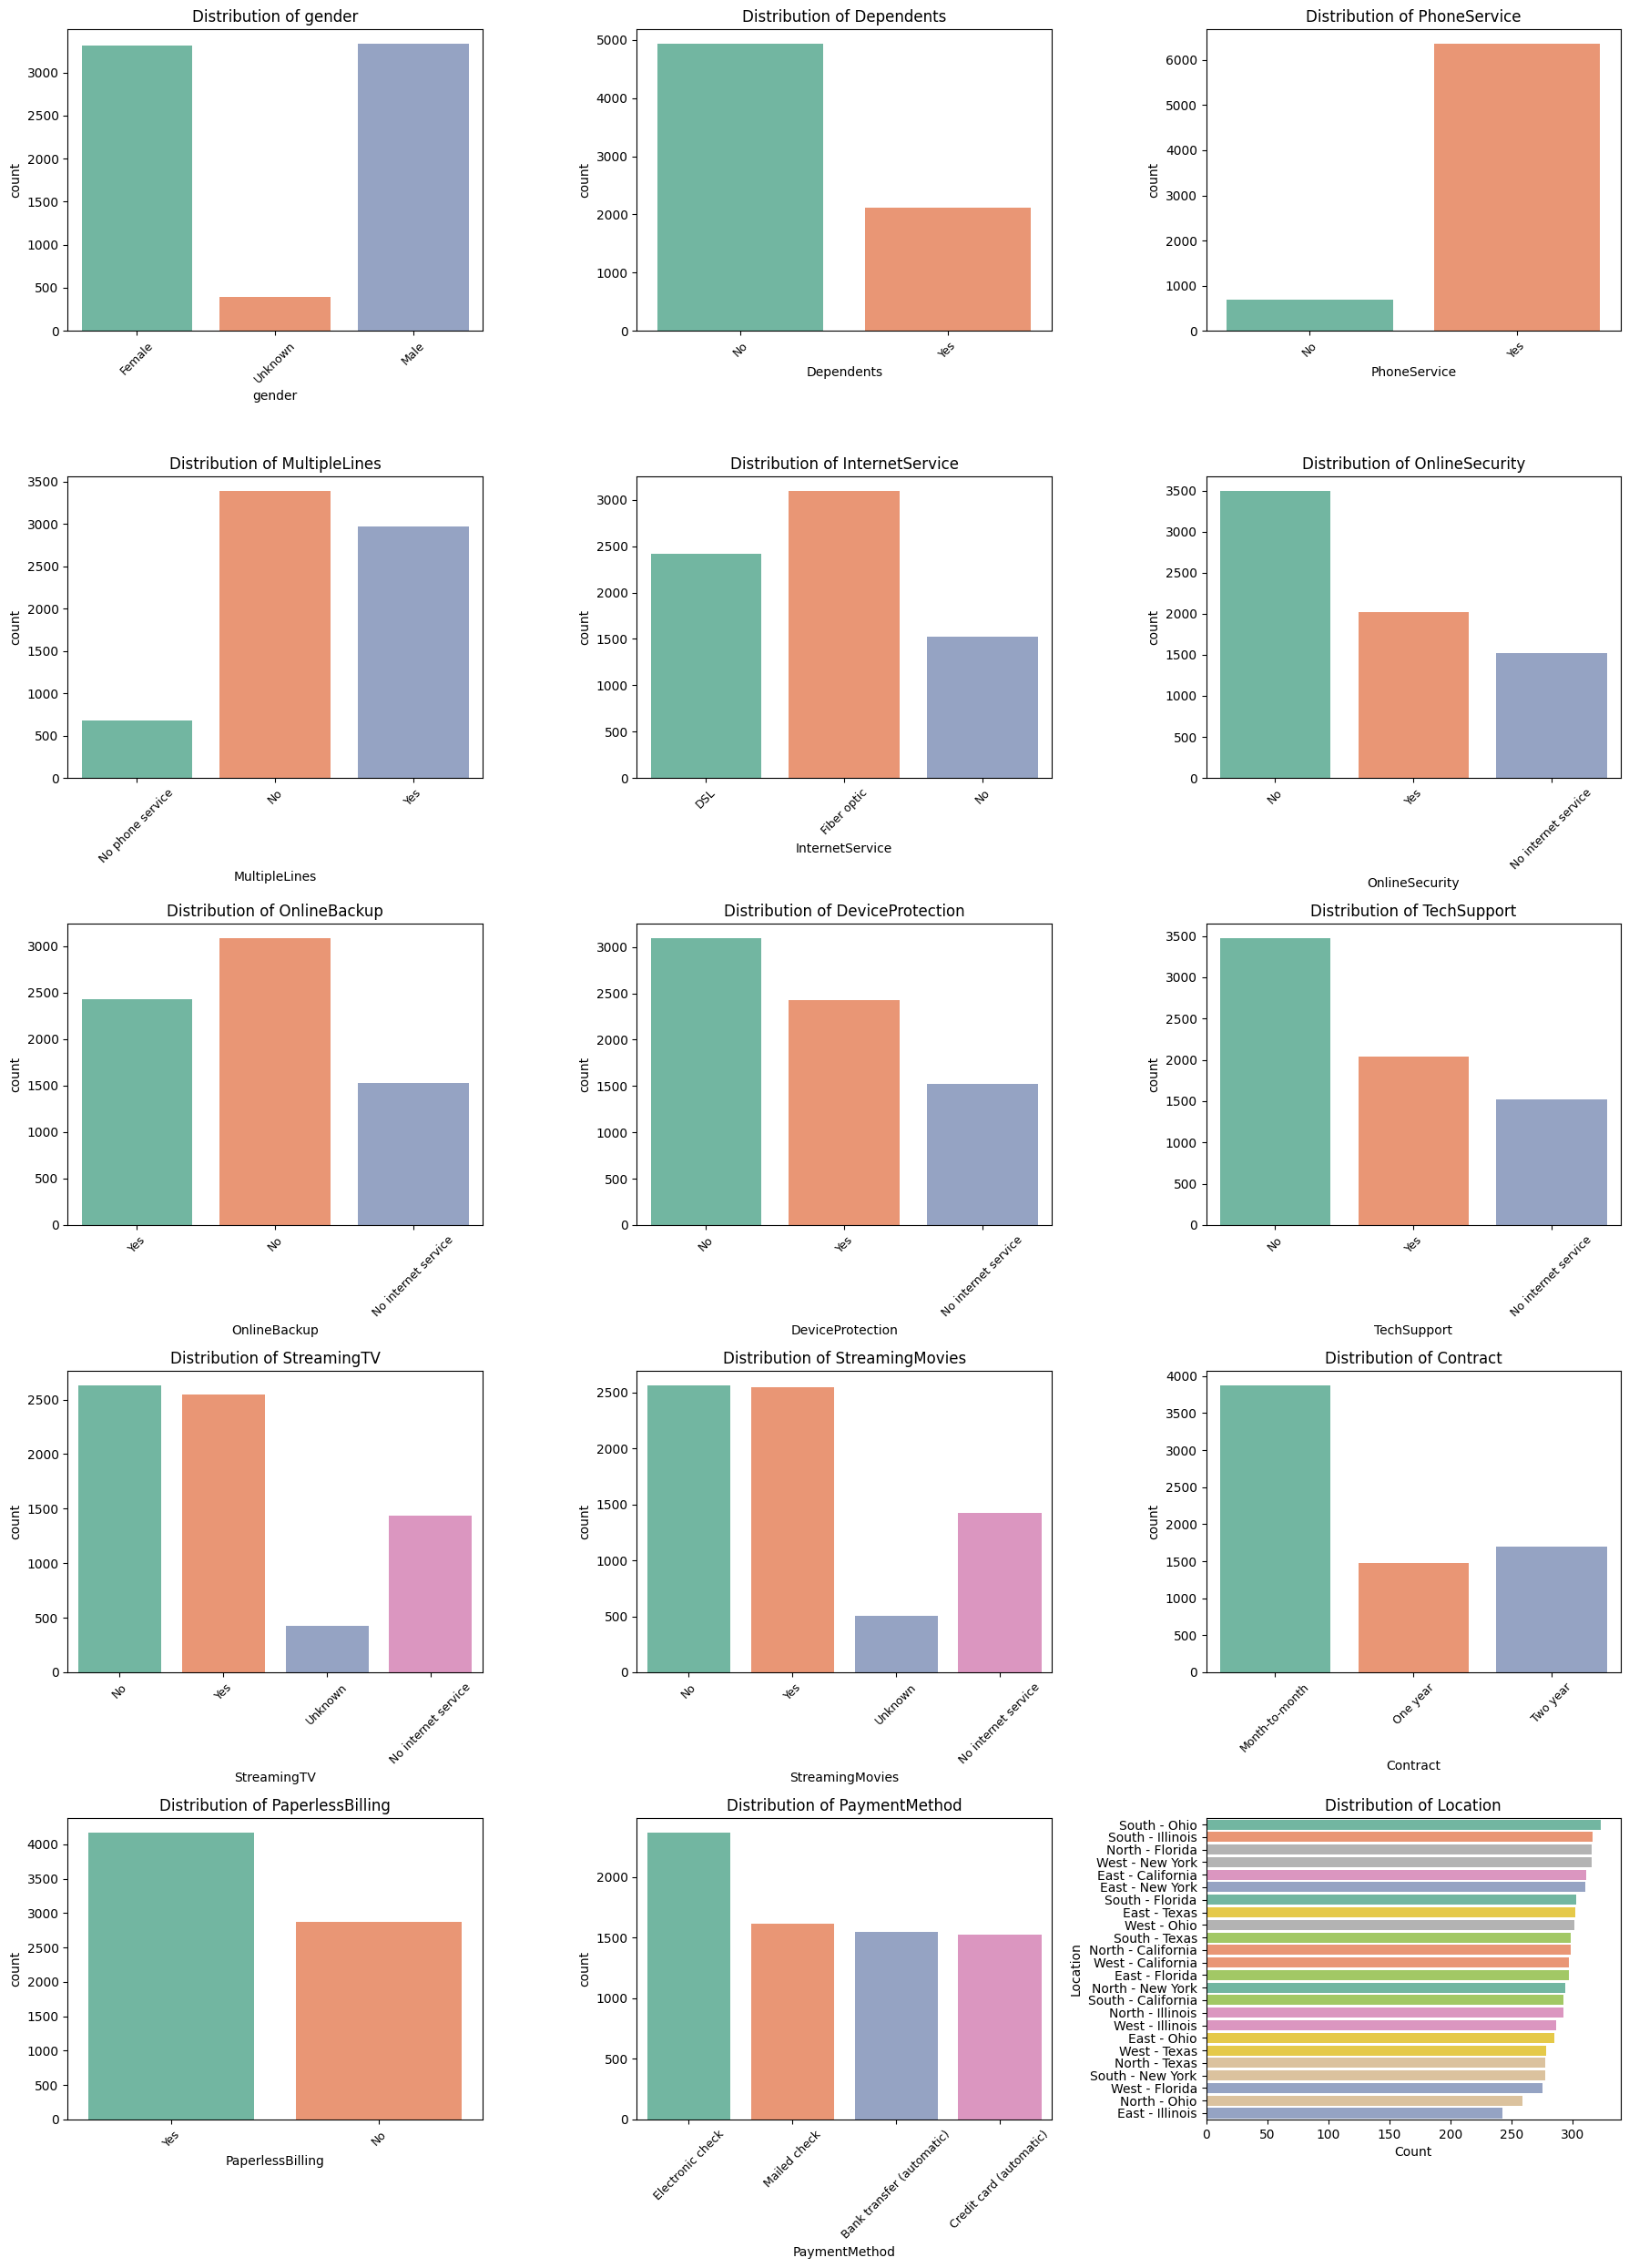

In [24]:
# Identify categorical columns (excluding target/id)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'customerID']

num_plots = len(cat_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    if col == 'Location':
        # Horizontal for readability
        order = df['Location'].value_counts().index
        sns.countplot(y='Location', data=df, order=order,
                      hue='Location', palette='Set2', legend=False, ax=ax)
        ax.set_title("Distribution of Location")
        ax.set_xlabel("Count"); ax.set_ylabel("Location")
    else:
        sns.countplot(x=col, data=df, hue=col,
                      palette='Set2', legend=False, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.tick_params(axis='x', rotation=45, labelsize=9)

# Hide unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


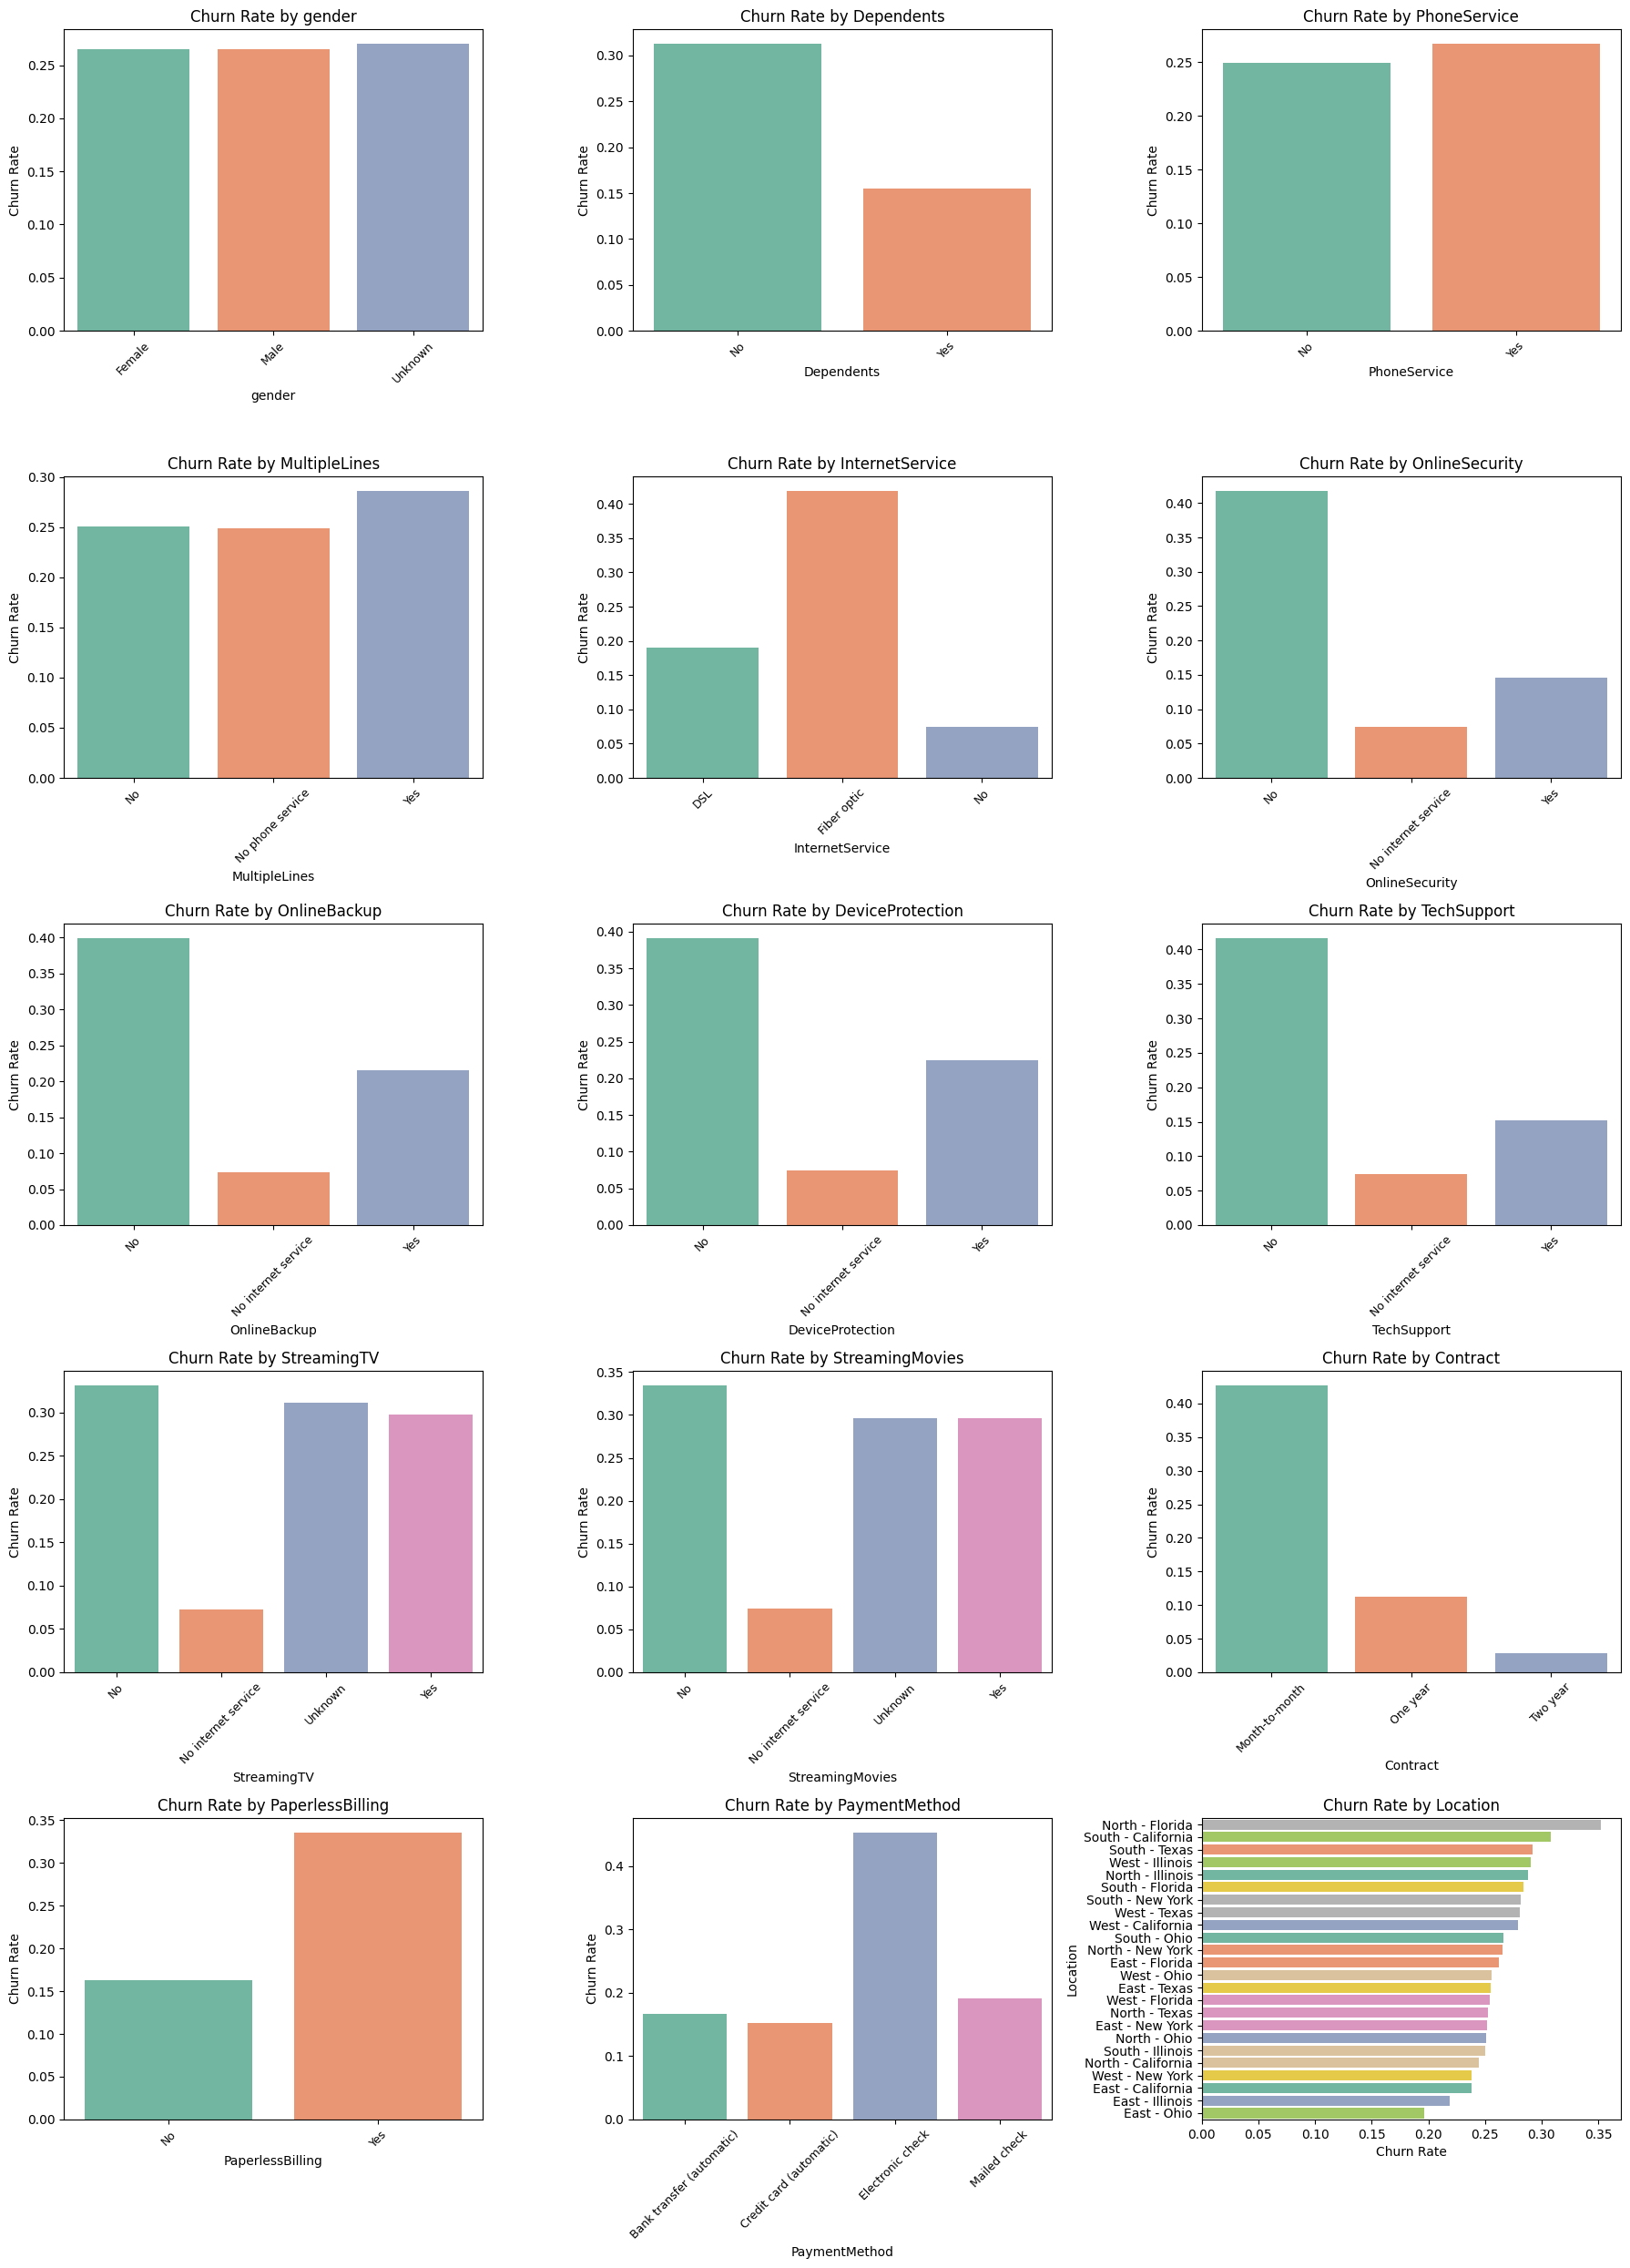

In [25]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ['customerID']]  # exclude ID

num_plots = len(cat_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    churn_rate = df.groupby(col)['Churn'].mean().reset_index()

    if col == 'Location':
        order = df.groupby('Location')['Churn'].mean().sort_values(ascending=False).index
        sns.barplot(y=col, x='Churn', data=churn_rate, order=order,
                    hue=col, palette='Set2', legend=False, ax=axes[i])
        axes[i].set_title(f"Churn Rate by {col}")
        axes[i].set_xlabel("Churn Rate")
        axes[i].set_ylabel("Location")
    else:
        sns.barplot(x=col, y='Churn', data=churn_rate,
                    hue=col, palette='Set2', legend=False, ax=axes[i])
        axes[i].set_title(f"Churn Rate by {col}")
        axes[i].set_ylabel("Churn Rate")
        axes[i].tick_params(axis='x', rotation=45, labelsize=9)

# Hide unused plots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [26]:
# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude target variable
if "Churn" in num_cols:
    num_cols.remove("Churn")

print("Numeric columns:", num_cols)

# Create DataFrame with only numeric predictors
X_num = df[num_cols]
X_num.head()


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,0,1,29.85,29.85,0.0,0
1,0,34,56.95,1889.50,0.0,0
2,0,2,53.85,108.15,0.0,0
3,0,45,42.30,1840.75,0.0,3
4,0,2,70.70,151.65,0.0,0


In [27]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Convert back to DataFrame with same column names
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant
X_num_const = add_constant(X_num_scaled)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_num_const.values, i)
                   for i in range(X_num_const.shape[1])]

# Drop the constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)


           Feature       VIF
1    SeniorCitizen  1.057337
2           tenure  5.843503
3   MonthlyCharges  3.322166
4     TotalCharges  9.553854
5  numAdminTickets  1.000311
6   numTechTickets  1.099129


In [29]:
df = df.drop("TotalCharges", axis=1)

In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'Churn',
       'Location'],
      dtype='object')

In [31]:
print(df['Churn'].unique())
print(df['Churn'].isna().sum())


[0 1]
0


In [32]:

# WOE/IV for a single feature
def woe_iv_for_feature(df, feature, target, event=1, eps=1e-6):
    x = df[feature].astype(object).fillna("MISSING")
    y = df[target].astype(int)

    grouped = pd.DataFrame({'total': x.value_counts(dropna=False)})
    grouped['event'] = x[y==event].value_counts(dropna=False).reindex(grouped.index, fill_value=0)
    grouped['non_event'] = grouped['total'] - grouped['event']

    total_event = grouped['event'].sum()
    total_non_event = grouped['non_event'].sum()

    grouped['event_pct'] = grouped['event'] / max(total_event, eps)
    grouped['non_event_pct'] = grouped['non_event'] / max(total_non_event, eps)

    grouped['woe'] = np.log((grouped['non_event_pct'] + eps) / (grouped['event_pct'] + eps))
    grouped['iv']  = (grouped['non_event_pct'] - grouped['event_pct']) * grouped['woe']

    grouped = grouped.rename_axis(feature).reset_index()
    iv_total = grouped['iv'].sum()
    return grouped, iv_total


# Numeric binning helper
def bin_numeric_safely(s, n_bins=10):
    s_na = s.isna()
    uniq = s[~s_na].nunique()
    if uniq <= 2:
        return s.astype(object)
    bins = min(n_bins, max(2, uniq - 1))
    try:
        return pd.qcut(s, q=bins, duplicates='drop')
    except Exception:
        return pd.cut(s, bins=bins, duplicates='drop')


# WOE/IV for all features
def compute_woe_iv_all(df, target='Churn', numeric_bins=10):
    iv_summary = []
    woe_tables = {}

    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if target in cat_cols: cat_cols.remove(target)
    if target in num_cols: num_cols.remove(target)

    # Categorical
    for col in cat_cols:
        tbl, iv = woe_iv_for_feature(df[[col, target]], col, target, event=1)
        woe_tables[col] = tbl
        iv_summary.append((col, iv))

    # Numeric
    for col in num_cols:
        if col == 'customerID': 
            continue
        binned = bin_numeric_safely(df[col], n_bins=numeric_bins)
        temp = pd.DataFrame({f'{col}_binned': binned, target: df[target]})
        tbl, iv = woe_iv_for_feature(temp, f'{col}_binned', target, event=1)
        woe_tables[col] = tbl.rename(columns={f'{col}_binned': col})
        iv_summary.append((col, iv))

    iv_df = pd.DataFrame(iv_summary, columns=['feature', 'iv']).sort_values('iv', ascending=False)
    return iv_df, woe_tables


In [33]:
iv_df, woe_tables = compute_woe_iv_all(df, target='Churn', numeric_bins=10)

# Ranked features by IV
print(iv_df)

# Example WOE table for a categorical column
print(woe_tables['Contract'])

# Example WOE table for a numeric column (binned)
print(woe_tables['tenure'].head())


C:\Users\rutwi\AppData\Local\Temp\ipykernel_16504\1430705424.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = df[feature].astype(object).fillna("MISSING")
C:\Users\rutwi\AppData\Local\Temp\ipykernel_16504\1430705424.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = df[feature].astype(object).fillna("MISSING")
C:\Users\rutwi\AppData\Local\Temp\ipykernel_16504\1430705424.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instea

             feature         iv
0         customerID  11.553489
12          Contract   1.238548
17            tenure   0.823698
6     OnlineSecurity   0.717773
9        TechSupport   0.699564
5    InternetService   0.617949
7       OnlineBackup   0.528631
8   DeviceProtection   0.499721
20    numTechTickets   0.499638
14     PaymentMethod   0.457107
18    MonthlyCharges   0.364712
10       StreamingTV   0.359874
11   StreamingMovies   0.353032
13  PaperlessBilling   0.203068
2         Dependents   0.155487
16     SeniorCitizen   0.105621
15          Location   0.024293
4      MultipleLines   0.008207
3       PhoneService   0.000745
1             gender   0.000037
19   numAdminTickets   0.000000
         Contract  total  event  non_event  event_pct  non_event_pct  \
0  Month-to-month   3875   1655       2220   0.885500       0.429068   
1        Two year   1695     48       1647   0.025682       0.318322   
2        One year   1473    166       1307   0.088818       0.252609   

       

In [34]:
# Step 1: Keep features with IV > 0.02
selected_features = iv_df.loc[iv_df['iv'] > 0.02, 'feature'].tolist()

# Step 2: Remove customerID (identifier, target leakage)
if 'customerID' in selected_features:
    selected_features.remove('customerID')

# Step 3: Create modeling dataset
X = df[selected_features]
y = df['Churn']

print("Selected Features:", selected_features)
print("Shape of X:", X.shape)


Selected Features: ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'numTechTickets', 'PaymentMethod', 'MonthlyCharges', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Dependents', 'SeniorCitizen', 'Location']
Shape of X: (7043, 16)


In [35]:
# Only among your selected features
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features in X:", cat_features)

# Show uniques per selected categorical feature
for col in cat_features:
    print(f"\nFeature: {col}")
    print(f"Unique count: {X[col].nunique()}")
    print(f"Unique values: {X[col].unique()}")


Categorical features in X: ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Dependents', 'Location']

Feature: Contract
Unique count: 3
Unique values: ['Month-to-month' 'One year' 'Two year']

Feature: OnlineSecurity
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Feature: TechSupport
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Feature: InternetService
Unique count: 3
Unique values: ['DSL' 'Fiber optic' 'No']

Feature: OnlineBackup
Unique count: 3
Unique values: ['Yes' 'No' 'No internet service']

Feature: DeviceProtection
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Feature: PaymentMethod
Unique count: 4
Unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Feature: StreamingTV
Unique count: 4
Unique values: ['No' 'Yes' 'Unknown' 'No internet servi

In [36]:
cat_summary = (
    X[cat_features]
    .nunique()
    .rename("unique_count")
    .to_frame()
    .sort_values("unique_count", ascending=False)
)
print(cat_summary)


                  unique_count
Location                    24
PaymentMethod                4
StreamingTV                  4
StreamingMovies              4
Contract                     3
OnlineSecurity               3
TechSupport                  3
InternetService              3
OnlineBackup                 3
DeviceProtection             3
PaperlessBilling             2
Dependents                   2


In [37]:
# Collapse Location into Region
X['Region'] = X['Location'].str.split(' - ').str[0]

# Drop the original Location column
X = X.drop(columns=['Location'])

print(X['Region'].value_counts())


Region
South    1809
West     1752
East     1747
North    1735
Name: count, dtype: int64


C:\Users\rutwi\AppData\Local\Temp\ipykernel_16504\1290734310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Region'] = X['Location'].str.split(' - ').str[0]


C:\Users\rutwi\AppData\Local\Temp\ipykernel_16504\1037545779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='Location', data=region_churn, palette='Set2')


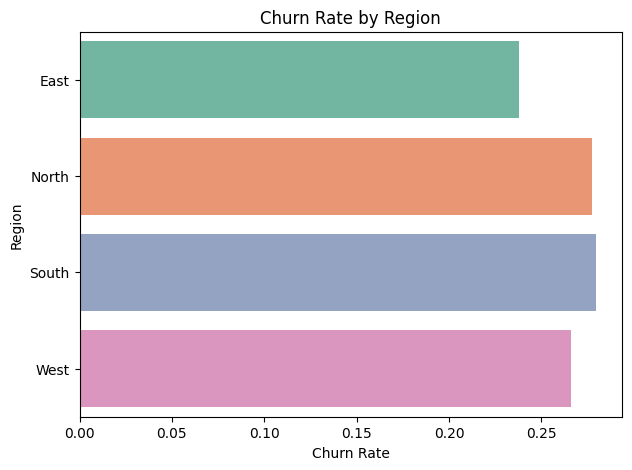

In [38]:
region_churn = df.groupby(df['Location'].str.split(' - ').str[0])['Churn'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='Churn', y='Location', data=region_churn, palette='Set2')
plt.title("Churn Rate by Region")
plt.xlabel("Churn Rate")
plt.ylabel("Region")
plt.show()


In [39]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Step 3: Split binary vs multi-category
binary_features = [col for col in cat_features if X[col].nunique() == 2]
multi_features  = [col for col in cat_features if X[col].nunique() > 2]

print("Binary features:", binary_features)
print("Multi-category features:", multi_features)

# Step 4: Encode binary features directly
for col in binary_features:
    X[col] = X[col].map(lambda x: 1 if x in ['Yes', 'Male', 'Electronic check'] else 0)

# Step 5: One-Hot encode the multi-category features (drop_first=True)
X = pd.get_dummies(X, columns=multi_features, drop_first=True)

print("Shape after encoding:", X.shape)
print("Encoded columns:", X.columns.tolist())

Binary features: ['PaperlessBilling', 'Dependents']
Multi-category features: ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod', 'StreamingTV', 'StreamingMovies', 'Region']
Shape after encoding: (7043, 30)
Encoded columns: ['tenure', 'numTechTickets', 'MonthlyCharges', 'PaperlessBilling', 'Dependents', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'StreamingTV_No internet service', 'StreamingTV_Unknown', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Unknown', 'StreamingMovies_Yes', 'Region_North

In [40]:
checks = {
    'Contract': ['Contract_One year','Contract_Two year'],
    'OnlineSecurity': ['OnlineSecurity_No internet service','OnlineSecurity_Yes'],
    'TechSupport': ['TechSupport_No internet service','TechSupport_Yes'],
    'InternetService': ['InternetService_Fiber optic','InternetService_No'],
    'OnlineBackup': ['OnlineBackup_No internet service','OnlineBackup_Yes'],
    'DeviceProtection': ['DeviceProtection_No internet service','DeviceProtection_Yes'],
    'PaymentMethod': ['PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check'],
    'StreamingTV': ['StreamingTV_No internet service','StreamingTV_Unknown','StreamingTV_Yes'],
    'StreamingMovies': ['StreamingMovies_No internet service','StreamingMovies_Unknown','StreamingMovies_Yes'],
    'Region': ['Region_North','Region_South','Region_West']
}

for base, cols in checks.items():
    missing = [c for c in cols if c not in X.columns]
    assert not missing, f"Missing dummies for {base}: {missing}"
    print(f"{base}: OK ({len(cols)} dummies)")
    
# Confirm binary columns are 0/1
assert set(X['PaperlessBilling'].unique()) <= {0,1}, "PaperlessBilling not binary 0/1"
assert set(X['Dependents'].unique()) <= {0,1}, "Dependents not binary 0/1"
print("Binary columns OK")


Contract: OK (2 dummies)
OnlineSecurity: OK (2 dummies)
TechSupport: OK (2 dummies)
InternetService: OK (2 dummies)
OnlineBackup: OK (2 dummies)
DeviceProtection: OK (2 dummies)
PaymentMethod: OK (3 dummies)
StreamingTV: OK (3 dummies)
StreamingMovies: OK (3 dummies)
Region: OK (3 dummies)
Binary columns OK


In [41]:
y = df['Churn']   # make sure Churn is binary 0/1

# Train-test split (stratified by churn)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train set:", X_train.shape, y_train.mean())
print("Test set:", X_test.shape, y_test.mean())


Train set: (4930, 30) 0.2653144016227181
Test set: (2113, 30) 0.26549929010885


In [42]:
num_features = ['tenure', 'numTechTickets', 'MonthlyCharges', 'SeniorCitizen']

scaler = StandardScaler()

# Fit on training, transform both
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      1552
           1       0.63      0.88      0.73       561

    accuracy                           0.83      2113
   macro avg       0.79      0.84      0.80      2113
weighted avg       0.86      0.83      0.84      2113

ROC AUC: 0.9272716935884008
Confusion Matrix:
 [[1259  293]
 [  69  492]]


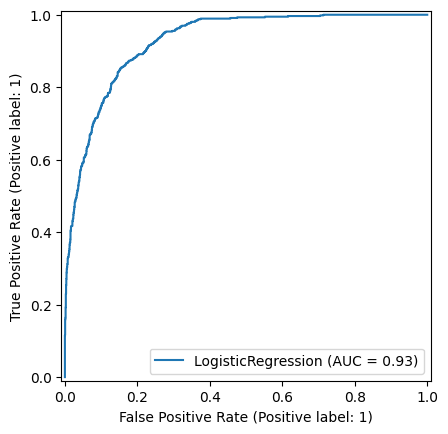

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]  # churn probabilities

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)


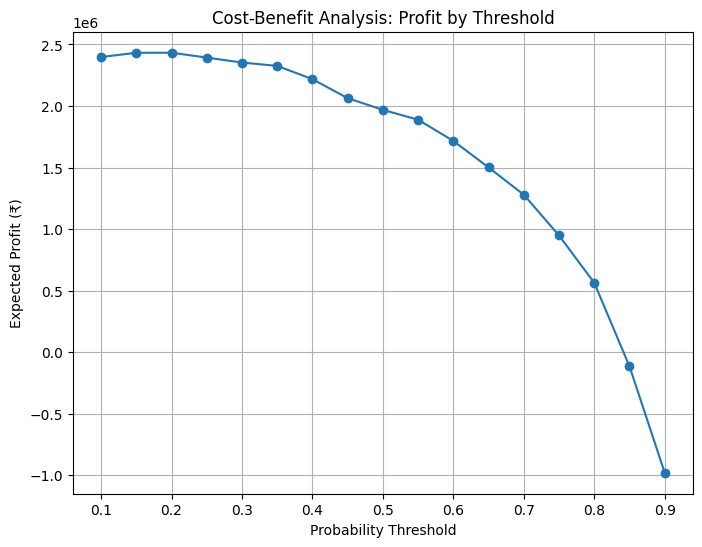

Best Threshold: 0.20000000000000004
Max Profit: ₹ 2433000


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Business assumptions (adjust as needed)
value_TP = 5000   # saved revenue per correctly identified churner
cost_FP  = 500    # wasted cost on wrongly targeting non-churner
cost_FN  = 5000   # lost revenue from missed churner
value_TN = 0      # no action, no cost

thresholds = np.arange(0.1, 0.91, 0.05)  # test thresholds from 0.1 to 0.9
profits = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()

    # Calculate profit
    profit = (tp * value_TP) - (fp * cost_FP) - (fn * cost_FN) + (tn * value_TN)
    profits.append(profit)

# Plot profit curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, profits, marker='o')
plt.title("Cost-Benefit Analysis: Profit by Threshold")
plt.xlabel("Probability Threshold")
plt.ylabel("Expected Profit (₹)")
plt.grid(True)
plt.show()

# Best threshold
best_idx = np.argmax(profits)
print("Best Threshold:", thresholds[best_idx])
print("Max Profit: ₹", profits[best_idx])


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1552
           1       0.75      0.65      0.69       561

    accuracy                           0.85      2113
   macro avg       0.81      0.78      0.80      2113
weighted avg       0.84      0.85      0.85      2113

ROC AUC (Random Forest): 0.9139239575867836
Confusion Matrix:
 [[1431  121]
 [ 198  363]]


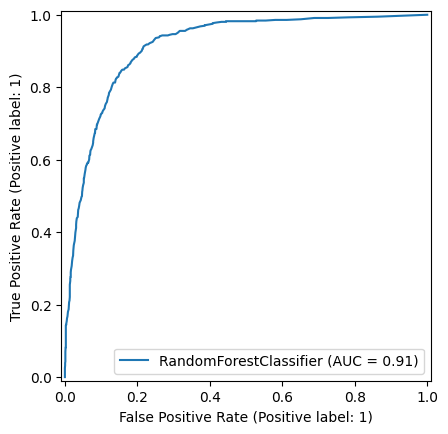

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train Random Forest with class weights
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("ROC AUC (Random Forest):", roc_auc_score(y_test, y_prob_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)


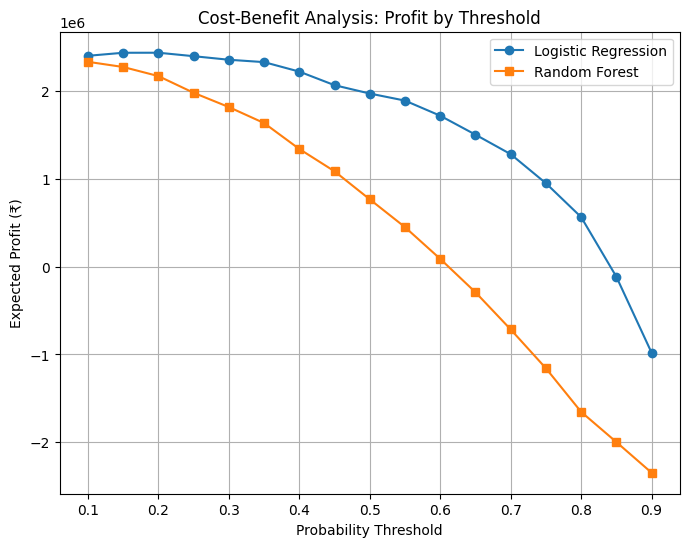

Random Forest - Best Threshold: 0.1
Random Forest - Max Profit: ₹ 2329500


In [46]:
profits_rf = []

for t in thresholds:
    y_pred_thresh = (y_prob_rf >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    
    profit = (tp * value_TP) - (fp * cost_FP) - (fn * cost_FN) + (tn * value_TN)
    profits_rf.append(profit)

# Plot profit curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, profits, marker='o', label="Logistic Regression")
plt.plot(thresholds, profits_rf, marker='s', label="Random Forest")
plt.title("Cost-Benefit Analysis: Profit by Threshold")
plt.xlabel("Probability Threshold")
plt.ylabel("Expected Profit (₹)")
plt.legend()
plt.grid(True)
plt.show()

# Best threshold for RF
best_idx_rf = np.argmax(profits_rf)
print("Random Forest - Best Threshold:", thresholds[best_idx_rf])
print("Random Forest - Max Profit: ₹", profits_rf[best_idx_rf])



Top 20 (by |coef|) — Logistic Regression
                                 feature      coef  odds_ratio
7                      Contract_Two year -2.027190    0.131705
0                                 tenure -1.714826    0.179995
1                         numTechTickets  1.649831    5.206099
12           InternetService_Fiber optic  1.012791    2.753275
6                      Contract_One year -0.889192    0.410988
9                     OnlineSecurity_Yes -0.591540    0.553474
24   StreamingMovies_No internet service -0.433683    0.648118
15                      OnlineBackup_Yes -0.414351    0.660769
3                       PaperlessBilling  0.306388    1.358509
19        PaymentMethod_Electronic check  0.279452    1.322405
2                         MonthlyCharges -0.254629    0.775204
17                  DeviceProtection_Yes -0.240132    0.786524
14      OnlineBackup_No internet service -0.222108    0.800829
16  DeviceProtection_No internet service -0.222108    0.800829
8     OnlineS

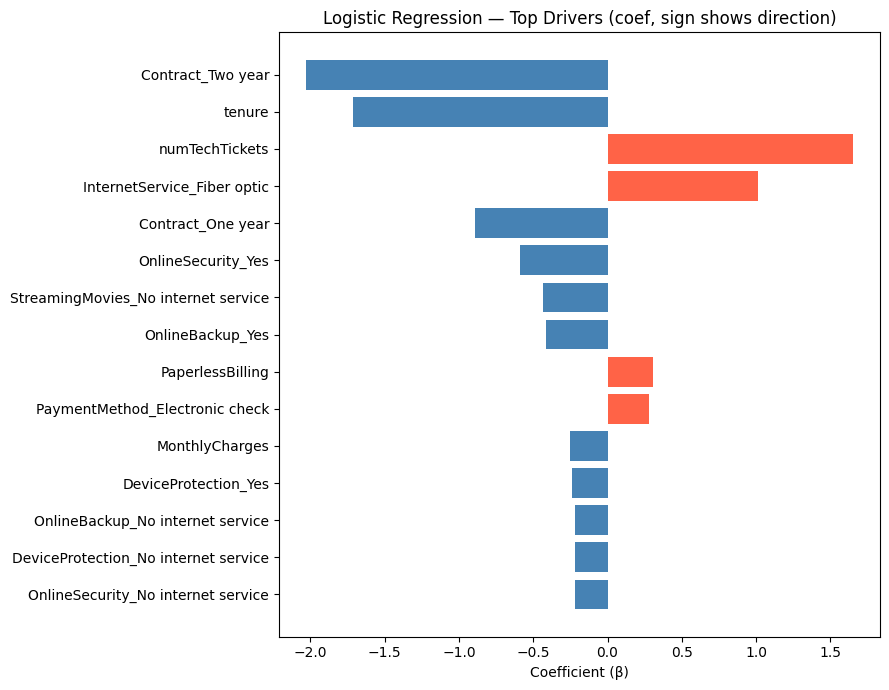


Top 20 — Random Forest Importances
tenure                            0.216599
MonthlyCharges                    0.158924
numTechTickets                    0.140509
Contract_Two year                 0.057762
InternetService_Fiber optic       0.038731
Contract_One year                 0.032754
PaymentMethod_Electronic check    0.030988
OnlineSecurity_Yes                0.026832
PaperlessBilling                  0.023064
TechSupport_Yes                   0.021622
OnlineBackup_Yes                  0.021219
DeviceProtection_Yes              0.018931
Dependents                        0.018695
Region_South                      0.017572
Region_North                      0.017034
Region_West                       0.015852
StreamingTV_Yes                   0.014836
SeniorCitizen                     0.014415
StreamingMovies_Yes               0.014340
PaymentMethod_Mailed check        0.012429
Name: importance, dtype: float64


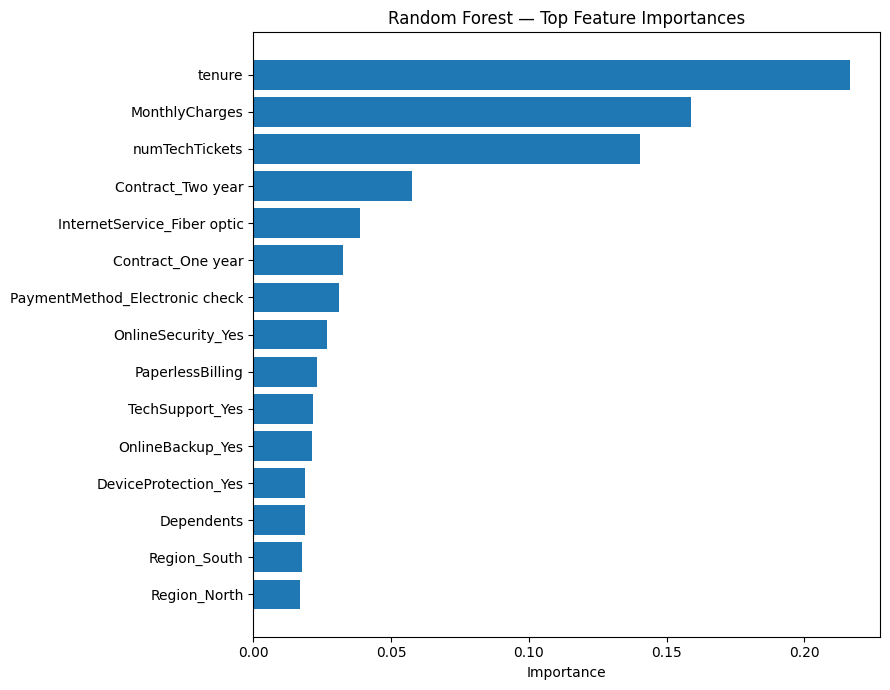

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- LOGISTIC REGRESSION: coefficients & odds ratios ----------
coef = pd.Series(log_reg.coef_[0], index=X_train.columns, name="coef")
odds = np.exp(coef)
log_df = pd.DataFrame({"feature": coef.index, "coef": coef.values, "odds_ratio": odds.values})
log_df["abs_coef"] = log_df["coef"].abs()
log_df = log_df.sort_values("abs_coef", ascending=False)

print("\nTop 20 (by |coef|) — Logistic Regression")
print(log_df.head(20)[["feature","coef","odds_ratio"]])

# Plot: top 15 by |coef|
top_log = log_df.head(15).copy()
colors = np.where(top_log["coef"]>0, "tomato", "steelblue")

plt.figure(figsize=(9,7))
plt.barh(top_log["feature"][::-1], top_log["coef"][::-1], color=colors[::-1])
plt.title("Logistic Regression — Top Drivers (coef, sign shows direction)")
plt.xlabel("Coefficient (β)")
plt.tight_layout()
plt.show()

# ---------- RANDOM FOREST: feature importances ----------
rf_imp = pd.Series(rf.feature_importances_, index=X_train.columns, name="importance")
rf_imp = rf_imp.sort_values(ascending=False)

print("\nTop 20 — Random Forest Importances")
print(rf_imp.head(20))

# Plot: top 15 importances
top_rf = rf_imp.head(15)

plt.figure(figsize=(9,7))
plt.barh(top_rf.index[::-1], top_rf.values[::-1])
plt.title("Random Forest — Top Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# imbalance weight from your training split
pos_w = (len(y_train) - y_train.sum()) / y_train.sum()

xgb_base = XGBClassifier(
    n_estimators=600,              # large enough; we’ll tune learning_rate etc.
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=pos_w,
    tree_method="hist",            # fast; use "gpu_hist" if you have GPU
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth":        [3, 4, 5, 6, 7],
    "learning_rate":    [0.02, 0.05, 0.075, 0.1, 0.15],
    "subsample":        [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 3, 5, 7],
    "gamma":            [0, 0.5, 1.0],
    "reg_lambda":       [1, 2, 5, 10],
    "reg_alpha":        [0, 0.1, 0.5, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rand = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=40,                  # bump to 80+ if you want more thorough search
    scoring="roc_auc",          # use "recall" if that’s your primary KPI
    cv=cv,
    verbose=1,
    n_jobs=-1,
    refit=True,                 # best model refit on full train
    random_state=42
)

rand.fit(X_train, y_train)
print("Best AUC (CV):", rand.best_score_)
print("Best params:", rand.best_params_)
best_xgb = rand.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best AUC (CV): 0.9259701122217179
Best params: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.5, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.02, 'gamma': 0, 'colsample_bytree': 0.6}


In [49]:
from sklearn.model_selection import GridSearchCV

# build a tight grid around the random-search winner
bp = rand.best_params_
grid_params = {
    "max_depth":        [bp["max_depth"]-1, bp["max_depth"], bp["max_depth"]+1],
    "learning_rate":    [max(0.01, bp["learning_rate"]*0.6), bp["learning_rate"], bp["learning_rate"]*1.4],
    "subsample":        [max(0.5, bp["subsample"]-0.1), bp["subsample"], min(1.0, bp["subsample"]+0.1)],
    "colsample_bytree": [max(0.5, bp["colsample_bytree"]-0.1), bp["colsample_bytree"], min(1.0, bp["colsample_bytree"]+0.1)],
    "min_child_weight": [max(1, bp["min_child_weight"]-2), bp["min_child_weight"], bp["min_child_weight"]+2],
}

grid = GridSearchCV(
    estimator=best_xgb,
    param_grid=grid_params,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(X_train, y_train)
print("Refined best AUC (CV):", grid.best_score_)
print("Refined best params:", grid.best_params_)
best_xgb = grid.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Refined best AUC (CV): 0.9262428314449218
Refined best params: {'colsample_bytree': 0.7, 'learning_rate': 0.012, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0}


Test ROC AUC: 0.9304542927761545
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1552
           1       0.65      0.89      0.75       561

    accuracy                           0.84      2113
   macro avg       0.80      0.86      0.82      2113
weighted avg       0.87      0.84      0.85      2113



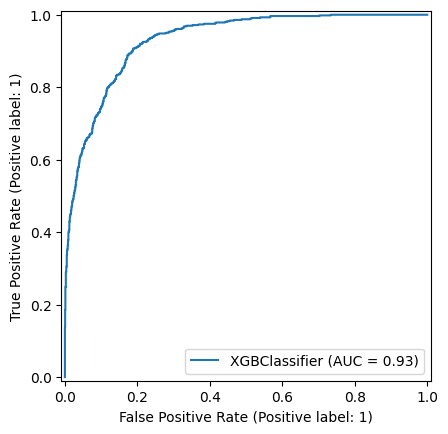

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)  # temporary; you’ll tune threshold

print("Test ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)


In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Business assumptions (edit if needed)
value_TP = 5000
cost_FP  = 500
cost_FN  = 5000
value_TN = 0

thresholds = np.arange(0.1, 0.91, 0.05)

def profit_curve(y_true, y_prob, thresholds):
    profits = []
    cms = []  # store confusion matrices per threshold (optional)
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        profit = (tp * value_TP) - (fp * cost_FP) - (fn * cost_FN) + (tn * value_TN)
        profits.append(profit)
        cms.append((tn, fp, fn, tp))
    return np.array(profits), cms

profits_lr, cms_lr   = profit_curve(y_test, y_prob, thresholds)
profits_rf, cms_rf   = profit_curve(y_test, y_prob_rf, thresholds)
profits_xgb, cms_xgb = profit_curve(y_test, y_prob_xgb, thresholds)


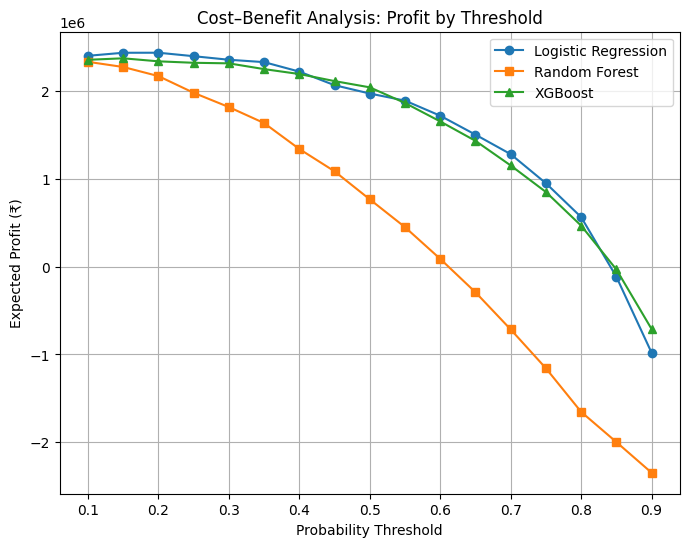

In [52]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, profits_lr,  marker='o', label='Logistic Regression')
plt.plot(thresholds, profits_rf,  marker='s', label='Random Forest')
plt.plot(thresholds, profits_xgb, marker='^', label='XGBoost')
plt.title("Cost–Benefit Analysis: Profit by Threshold")
plt.xlabel("Probability Threshold")
plt.ylabel("Expected Profit (₹)")
plt.grid(True)
plt.legend()
plt.show()


In [53]:
def summarize(name, thresholds, profits, cms):
    i = int(np.argmax(profits))
    tn, fp, fn, tp = cms[i]
    print(f"{name}:")
    print(f"  Best threshold: {thresholds[i]:.2f}")
    print(f"  Max Profit: ₹{profits[i]:,.0f}")
    print(f"  Confusion Matrix @ best threshold: [[TN={tn}, FP={fp}], [FN={fn}, TP={tp}]]\n")

summarize("Logistic Regression", thresholds, profits_lr, cms_lr)
summarize("Random Forest",       thresholds, profits_rf, cms_rf)
summarize("XGBoost",             thresholds, profits_xgb, cms_xgb)


Logistic Regression:
  Best threshold: 0.20
  Max Profit: ₹2,433,000
  Confusion Matrix @ best threshold: [[TN=988, FP=564], [FN=9, TP=552]]

Random Forest:
  Best threshold: 0.10
  Max Profit: ₹2,329,500
  Confusion Matrix @ best threshold: [[TN=981, FP=571], [FN=19, TP=542]]

XGBoost:
  Best threshold: 0.15
  Max Profit: ₹2,369,500
  Confusion Matrix @ best threshold: [[TN=1001, FP=551], [FN=16, TP=545]]



In [54]:
all_best = {
    "LR":   (thresholds[np.argmax(profits_lr)],  np.max(profits_lr)),
    "RF":   (thresholds[np.argmax(profits_rf)],  np.max(profits_rf)),
    "XGB":  (thresholds[np.argmax(profits_xgb)], np.max(profits_xgb)),
}
best_model = max(all_best.items(), key=lambda kv: kv[1][1])
print(f"Winner by profit: {best_model[0]}  |  threshold={best_model[1][0]:.2f}  |  profit=₹{best_model[1][1]:,.0f}")


Winner by profit: LR  |  threshold=0.20  |  profit=₹2,433,000


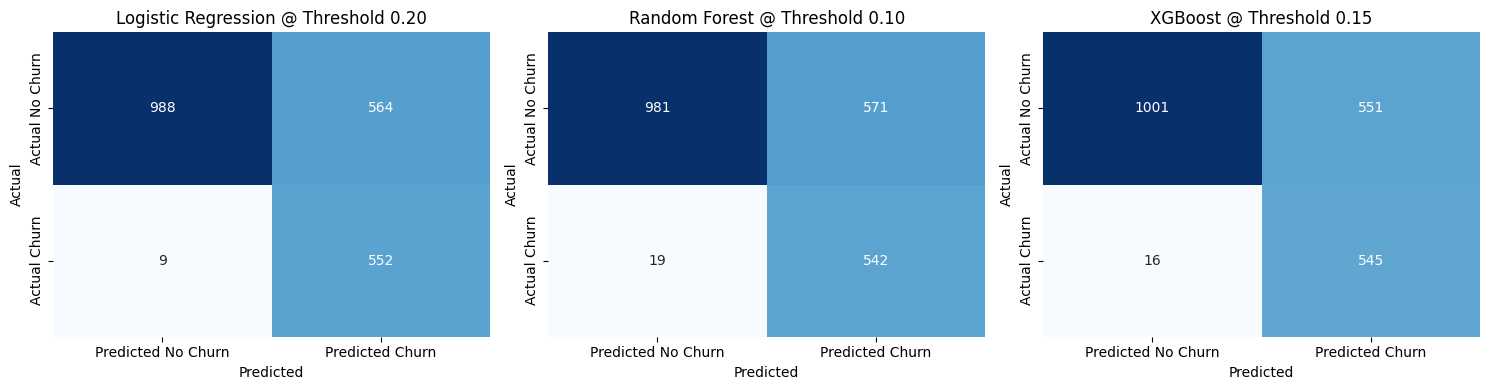

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(ax, cm, model_name, threshold):
    tn, fp, fn, tp = cm
    cm_matrix = np.array([[tn, fp],
                          [fn, tp]])

    sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted No Churn", "Predicted Churn"],
                yticklabels=["Actual No Churn", "Actual Churn"],
                ax=ax)
    ax.set_title(f"{model_name} @ Threshold {threshold:.2f}")
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")

# ---- Find best thresholds ----
i_lr = int(np.argmax(profits_lr))
i_rf = int(np.argmax(profits_rf))
i_xgb = int(np.argmax(profits_xgb))

# ---- Create subplots ----
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plot_confusion_matrix(axes[0], cms_lr[i_lr], "Logistic Regression", thresholds[i_lr])
plot_confusion_matrix(axes[1], cms_rf[i_rf], "Random Forest", thresholds[i_rf])
plot_confusion_matrix(axes[2], cms_xgb[i_xgb], "XGBoost", thresholds[i_xgb])

plt.tight_layout()
plt.show()

In [56]:


scored = pd.DataFrame({
    "customerID": df.loc[X_test.index, "customerID"],
    "Actual":     y_test.astype(int).values,        # 0/1 churn
    "Prob_LR":    y_prob,                           # logistic regression probs
    "Prob_XGB":   y_prob_xgb,                       # xgboost probs
    "Region":     df.loc[X_test.index, "Location"].str.split(" - ").str[0],
    "Contract":   df.loc[X_test.index, "Contract"],
    "Tenure":     df.loc[X_test.index, "tenure"],
    "MonthlyCharges": df.loc[X_test.index, "MonthlyCharges"],
    "PaymentMethod":  df.loc[X_test.index, "PaymentMethod"],
})

scored.to_csv("scored_customers.csv", index=False)
print("Saved scored_customers.csv with shape:", scored.shape)
scored.head()


Saved scored_customers.csv with shape: (2113, 9)


,customerID,Actual,Prob_LR,Prob_XGB,Region,Contract,Tenure,MonthlyCharges,PaymentMethod
4994,9692-TUSXH,1,0.850248,0.919505,South,Month-to-month,18,96.05,Electronic check
6828,2005-DWQZJ,0,0.043942,0.011997,West,Two year,8,19.05,Mailed check
755,6683-VLCTZ,1,0.989262,0.990955,East,Month-to-month,20,98.55,Electronic check
404,5495-GPSRW,0,0.032888,0.029820,South,Two year,20,19.70,Mailed check
981,1106-HRLKZ,0,0.004911,0.010999,West,Two year,40,19.60,Mailed check


In [57]:
# Logistic Regression Coefficients

lr_coef = pd.DataFrame({
    "Feature": X_train.columns,
    "Coef": log_reg.coef_[0]
})
lr_coef["OddsRatio"] = np.exp(lr_coef["Coef"])
lr_coef.sort_values("Coef", key=np.abs, ascending=False, inplace=True)
lr_coef.to_excel("lr_coefficients.xlsx", index=False)
print("Saved lr_coefficients.xlsx")

# XGBoost Feature Importances
xgb_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_xgb.feature_importances_
}).sort_values("Importance", ascending=False)
xgb_imp.to_excel("xgb_feature_importance.xlsx", index=False)
print("Saved xgb_feature_importance.xlsx")


Saved lr_coefficients.xlsx
Saved xgb_feature_importance.xlsx
